# Investigate a Dataset Project


#### Introduction

The data comes from the FBI's National Instant Criminal Background Check System.

The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives.

Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.

#### 1. What is the most popular gun type?
#### 2. Which state has had the highest growth in gun registrations?
#### 3. What is the overall trend of gun purchases?


In [4]:
import datetime

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ast

%matplotlib inline


## Data Wrangling

#### read gun_data.csv into pandas dataframe

In [6]:
dfgun = pd.read_csv('gun_data.csv')
dfgun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


dfcensus = pd.read_csv('U.S. Census Data.csv')
dfcensus.head()

In [7]:
dfcensus = pd.read_csv('u.s.-census-data.csv')
dfcensus.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


#### Display the shape of the dataframe. It shows 12485 rows and 27 columns

In [8]:
dfgun.shape

(12485, 27)

In [9]:
dfcensus.shape

(85, 52)

#### Confirm that there are no duplicated rows in either dataset

In [10]:
dfgun.duplicated().sum()

0

In [11]:
dfcensus.duplicated().sum()

3

#### Remove the 3 duplicated rows found in the Census Data

In [12]:
dfcensus.drop_duplicates(inplace = True)

In [13]:
dfcensus.duplicated().sum()

0

#### Confirm duplicates have been removed

#### Exploring both datasets further

In [14]:
dfgun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [15]:
dfgun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

#### Converting to correct data types

In [16]:
dfgun['month'] = pd.to_datetime(dfgun['month'])

In [17]:
dfgun['multiple'] = pd.to_numeric(dfgun['multiple']).astype(float)
dfgun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

#### Getting rid of unnecessary columns in gun dataset

In [18]:
column_name = dfgun.columns[15:26]

dfgun = dfgun.drop(columns=column_name)
dfgun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                12485 non-null  datetime64[ns]
 1   state                12485 non-null  object        
 2   permit               12461 non-null  float64       
 3   permit_recheck       1100 non-null   float64       
 4   handgun              12465 non-null  float64       
 5   long_gun             12466 non-null  float64       
 6   other                5500 non-null   float64       
 7   multiple             12485 non-null  float64       
 8   admin                12462 non-null  float64       
 9   prepawn_handgun      10542 non-null  float64       
 10  prepawn_long_gun     10540 non-null  float64       
 11  prepawn_other        5115 non-null   float64       
 12  redemption_handgun   10545 non-null  float64       
 13  redemption_long_gun  10544 non-

#### The function below takes a list of columns to drop and a dataframe as the agruments and drops the specified colums.

In [21]:
def drop(col_list,dfgun):
    for i in col_list:
        dfgun.drop(dfgun.columns[dfgun.columns.str.contains('^'+i)], axis =1, inplace = True)

In [22]:
drop(['admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_handgun','redemption_long_gun','redemption_other'],dfgun)
dfgun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           12485 non-null  datetime64[ns]
 1   state           12485 non-null  object        
 2   permit          12461 non-null  float64       
 3   permit_recheck  1100 non-null   float64       
 4   handgun         12465 non-null  float64       
 5   long_gun        12466 non-null  float64       
 6   other           5500 non-null   float64       
 7   multiple        12485 non-null  float64       
 8   totals          12485 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 878.0+ KB


In [23]:
dfcensus.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Nonveteran-owned firms, 2012",(c),5.20%,7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,42418,0.048,50.40%,2.50%,1.90%,"8,001,024","66,455.52",1.50%,13.70%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


#### Confirm that all states are present in census and gun datasets

In [24]:
Census_index = dfcensus.iloc[0].index
Census_index

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [25]:
Gun_index = dfgun.groupby('state').sum().index
Gun_index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [26]:
len(Census_index[2:])

50

In [27]:
len(Gun_index[0:])

55

#### The gun index appears to be longer than the census index. 

#### I'll use a for loop to find the items not present in the census index

In [28]:
for s in Gun_index:
    if s not in Census_index:
        print(s)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [29]:
dfgun = dfgun[dfgun.state != 'District of Columbia']
dfgun = dfgun[dfgun.state != 'Virgin Islands']
dfgun = dfgun[dfgun.state != 'Guam']
dfgun = dfgun[dfgun.state != 'Puerto Rico']
dfgun = dfgun[dfgun.state != 'Mariana Islands']

#### After dropping DC and the territories, they no longer appear in the gun index. 

In [30]:
Gun_index = dfgun.groupby('state').sum().index
len(Gun_index[0:])

50

In [31]:
dfcensus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

#### Dropping the Fact Note column

In [32]:


dfcensus = dfcensus.drop(['Fact Note'], axis=1)

### Research Question #1: What is the most popular gun type?

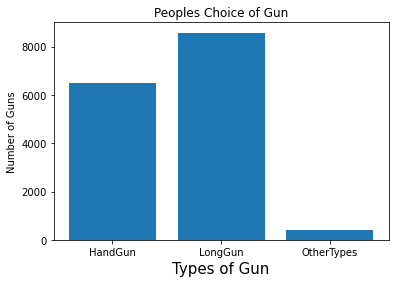

In [33]:
hand = dfgun['handgun'].mean()
long = dfgun['long_gun'].mean()
other = dfgun['other'].mean()
plt.bar([1,2,3], [hand, long, other],tick_label=['HandGun','LongGun','OtherTypes'])
plt.figsize=(20,10)
plt.title('Peoples Choice of Gun', fontsize=12)
plt.xlabel('Types of Gun', fontsize=15)
plt.ylabel('Number of Guns', fontsize=10);

#### Answer: Long Guns are the most popular type of gun

### Research Question #2: Which state has had the highest growth in gun registrations?

In [34]:
total_bystate = dfgun.groupby('state')

In [35]:
state_sum = total_bystate.sum()



In [36]:
state_total = state_sum['totals']

In [37]:
state_total.head()

state
Alabama        6706079
Alaska         1137643
Arizona        4425714
Arkansas       3752633
California    19014063
Name: totals, dtype: int64

In [38]:
state_highgrowth = dfgun.groupby(['month', 'state'])['totals'].sum()

In [39]:
dfgun = dfgun.sort_values(['totals'], ascending=False)

In [40]:

max_date = dfgun['month'].max()
min_date = dfgun['month'].min()

In [41]:
state_highgrowth_total = state_highgrowth.loc[max_date] - state_highgrowth.loc[min_date]
state_highgrowth_total.idxmax()

'Kentucky'

Total guns in Kentucky

In [42]:
state_highgrowth_total.loc['Kentucky']

397866

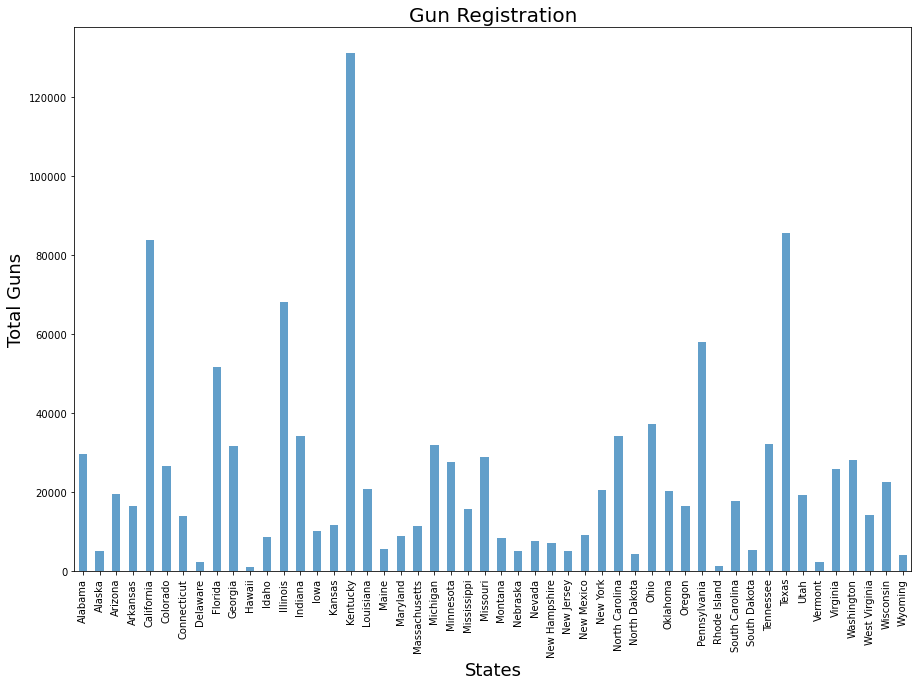

In [43]:

dfgun.groupby('state')['totals'].mean().plot(kind='bar', figsize=(15,10), alpha=.7)
plt.xlabel('States', fontsize=18)
plt.ylabel('Total Guns', fontsize=18)
plt.title('Gun Registration',fontsize=20);

Answer: Kentucky is the state with the highest growth in gun registration

### Research Question #2: What is the overall trend of gun purchases over time?

In [44]:
dfgun_totals = dfgun[['month','totals']]
dfgun_totals.set_index('month', inplace = True)

dfgun_totals = dfgun_totals[::-1]

gun_totals_groupby_month = dfgun_totals.groupby('month').sum()



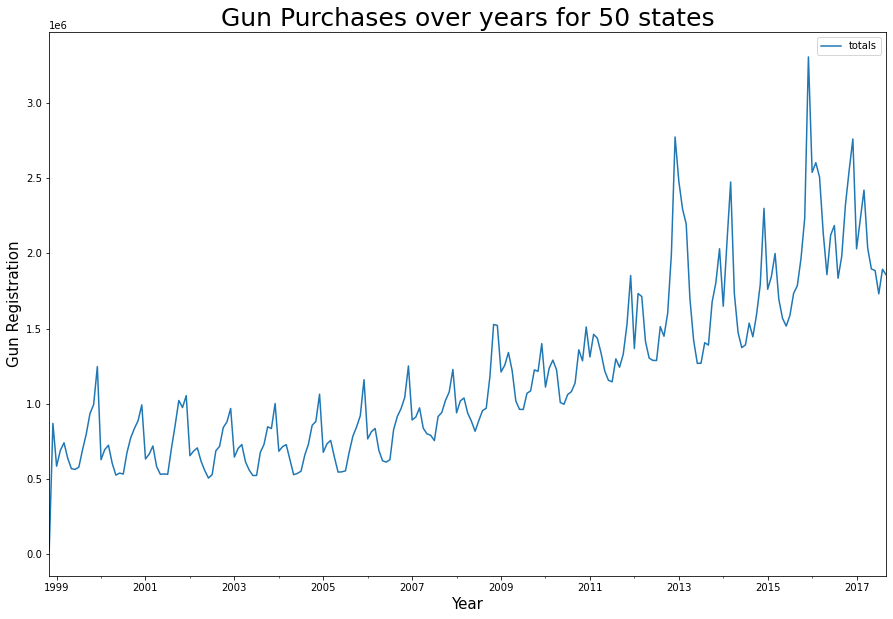

In [46]:
ax = gun_totals_groupby_month.plot(kind='line',figsize=(15,10))
ax.set_title('Gun Purchases over years for 50 states', fontsize=25)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Gun Registration', fontsize=15);





The graph above clearly shows an upward trend

## Conclusion:

### Limitations:

In [ ]:
In the census data there was no data for DC and US territories.

Data was seperated into two tables which affected the process of analysis. Additionally, the population data was only recorded for 2010 and 2016.

The dataset of gun data has many null values, which I felt I could not remove since it would skew the data potentially causing the analysis to be incorrect. 

Having the gun and census datasets in separate files and formats was a limitation for me. I was not able to combine the dataset to answer potentially more interesting questions. 




In conclusion, I was able to answer each of the research questions posed. I would have guessed that hand guns would be more popular than long guns, but that is not the case. The data shows that long guns are far more popular than hand guns. 

The State of Kentucky has the highest Gun Registrations of any state in the US. The cause could be due to more lenient laws regarding firearms in that state and this would be interesting to investigate further. 

There is a definiite upward trend upward of gun purchases as shown in the last vizualization. There seems to be a strong pattern in the peaks and valleys from year to year and this would be interesting to investigat further as well. 


In [3]:
!jupyter nbconvert --to html your_notebook_name.ipynb

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'your_notebook_name.ipynb' matched no files



--writer=<DottedObjectName> (NbConvertApp.writer_class)

    Default: 'FilesWriter'

    Writer class used to write the  results of the conversion

--post=<DottedOrNone> (NbConvertApp.postprocessor_class)

    Default: ''

    PostProcessor class used to write the results of the conversion

--output=<Unicode> (NbConvertApp.output_base)

    Default: ''

    overwrite base name use for output files. can only be used when converting

    one notebook at a time.

--output-dir=<Unicode> (FilesWriter.build_directory)

    Default: ''

    Directory to write output(s) to. Defaults to output to the directory of each

    notebook. To recover previous default behaviour (outputting to the current

    working directory) use . as the flag value.

--reveal-prefix=<Unicode> (SlidesExporter.reveal_url_prefix)

    Default: ''

    The URL prefix for reveal.js (version 3.x). This defaults to the reveal CDN,

    but can be any url pointing to a copy  of reveal.js.

    For speaker notes to work, th